In [1]:
import pandas as pd
import requests
import matplotlib as mtplt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://teste-inpe.herokuapp.com/"
response = requests.get(url)

In [3]:
data_fr = pd.read_json(url)

In [4]:
data_fr

,id,comp_bx,comp_by,comp_bz,comp_bt,lon_gsm,lat_gsm,density,speed,temperature
0,"{'date': '2019-11-05', 'time': '00:00:00'}",1.28,2.73,-1.83,3.53,64.95,-31.36,6.18,390.2,71640
1,"{'date': '2019-11-05', 'time': '00:01:00'}",1.08,2.77,-1.96,3.56,68.67,-33.50,3.67,372.0,31840
2,"{'date': '2019-11-05', 'time': '00:02:00'}",1.03,2.78,-1.91,3.52,69.65,-32.74,6.87,394.1,94546
3,"{'date': '2019-11-05', 'time': '00:03:00'}",0.99,2.91,-1.87,3.59,71.13,-31.31,6.06,384.4,63146
4,"{'date': '2019-11-05', 'time': '00:04:00'}",1.20,2.72,-2.04,3.60,66.24,-34.50,5.32,370.9,27611
...,...,...,...,...,...,...,...,...,...,...
2460,"{'date': '2019-11-06', 'time': '17:41:00'}",-3.25,1.44,0.29,3.57,156.13,4.74,6.14,380.5,39328
2461,"{'date': '2019-11-06', 'time': '17:42:00'}",-3.30,1.44,0.16,3.60,156.38,2.60,6.09,379.9,40176
2462,"{'date': '2019-11-06', 'time': '17:43:00'}",-3.24,1.47,-0.10,3.56,155.65,-1.53,6.19,379.2,39676
2463,"{'date': '2019-11-06', 'time': '17:44:00'}",-3.30,1.48,-0.05,3.61,155.81,-0.77,6.20,379.1,38826


In [147]:
 df = pd.DataFrame(
    {
     "date": [str(obj['date']) for obj in data_fr["id"]],
     "time": [str(obj['time']) for obj in data_fr["id"]],
     "comp_bx": [x for x in data_fr["comp_bx"]],
     "comp_by": [x for x in data_fr["comp_by"]],
     "comp_bz": [x for x in data_fr["comp_bz"]],
     "comp_bt": [x for x in data_fr["comp_bt"]],
     "lon_gsm": [x for x in data_fr["lon_gsm"]],
     "lat_gsm": [x for x in data_fr["lat_gsm"]],
     "density": [x for x in data_fr["density"]],
     "speed": [x for x in data_fr["speed"]],
     "temperature": [x for x in data_fr["temperature"]]
    }
)
df

,date,time,comp_bx,comp_by,comp_bz,comp_bt,lon_gsm,lat_gsm,density,speed,temperature
0,2019-11-05,00:00:00,1.28,2.73,-1.83,3.53,64.95,-31.36,6.18,390.2,71640
1,2019-11-05,00:01:00,1.08,2.77,-1.96,3.56,68.67,-33.50,3.67,372.0,31840
2,2019-11-05,00:02:00,1.03,2.78,-1.91,3.52,69.65,-32.74,6.87,394.1,94546
3,2019-11-05,00:03:00,0.99,2.91,-1.87,3.59,71.13,-31.31,6.06,384.4,63146
4,2019-11-05,00:04:00,1.20,2.72,-2.04,3.60,66.24,-34.50,5.32,370.9,27611
...,...,...,...,...,...,...,...,...,...,...,...
2460,2019-11-06,17:41:00,-3.25,1.44,0.29,3.57,156.13,4.74,6.14,380.5,39328
2461,2019-11-06,17:42:00,-3.30,1.44,0.16,3.60,156.38,2.60,6.09,379.9,40176
2462,2019-11-06,17:43:00,-3.24,1.47,-0.10,3.56,155.65,-1.53,6.19,379.2,39676
2463,2019-11-06,17:44:00,-3.30,1.48,-0.05,3.61,155.81,-0.77,6.20,379.1,38826


In [148]:
df.dtypes

date            object
time            object
comp_bx        float64
comp_by        float64
comp_bz        float64
comp_bt        float64
lon_gsm        float64
lat_gsm        float64
density        float64
speed          float64
temperature      int64
dtype: object

In [149]:
# values according to the hours
passed_hours = []
speeds = []
densities = []
comp_bx = []
comp_by = []
temperatures = []
hours = 0
for index, row in df.iterrows():
    if row["time"][3:5] == "00":
        passed_hours.append(hours)
        speeds.append(row["speed"])
        densities.append(row["density"])
        comp_bx.append(row["comp_bx"])
        comp_by.append(row["comp_by"])
        temperatures.append(row["temperature"])
        hours += 1

In [173]:
# values according to the hours and days
# fd: first day
fd_speeds = []
fd_densities = []
fd_temperatures = []
fd_passed_hours = []
hours = 0
fd_df = df.query('date == "2019-11-05"')
for index, row in fd_df.iterrows():
    if row["time"][3:5] == "00":
        fd_speeds.append(row["speed"])
        fd_densities.append(row["density"])
        fd_temperatures.append(row["temperature"])
        fd_passed_hours.append(hours)
        hours += 1

In [175]:
# values according to the hours and days
# sd: second day
sd_speeds = []
sd_densities = []
sd_temperatures = []
sd_passed_hours = []
hours = 0
sd_df = df.query('date == "2019-11-06"')
for index, row in sd_df.iterrows():
    if row["time"][3:5] == "00":
        sd_speeds.append(row["speed"])
        sd_densities.append(row["density"])
        sd_temperatures.append(row["temperature"])
        sd_passed_hours.append(hours)
        hours += 1

In [150]:
# there's a overflowed value that doesn't makes the graph too interesting
# we're taking it out by masking the arrays
def mask_the_array(arr):
    overflowed_value = 999999999.0
    arr = np.ma.array(arr)
    arr = np.ma.masked_where(arr == overflowed_value, arr)
    return arr
    
speeds = mask_the_array(speeds)
densities = mask_the_array(densities)
comp_bx = mask_the_array(comp_bx)
comp_by = mask_the_array(comp_by)
temperatures = mask_the_array(temperatures)

In [178]:
fd_speeds = mask_the_array(fd_speeds)
sd_speeds = mask_the_array(sd_speeds)
fd_densities = mask_the_array(fd_densities)
sd_densities = mask_the_array(sd_densities)
fd_temperatures = mask_the_array(fd_temperatures)
sd_temperatues = mask_the_array(sd_temperatures)

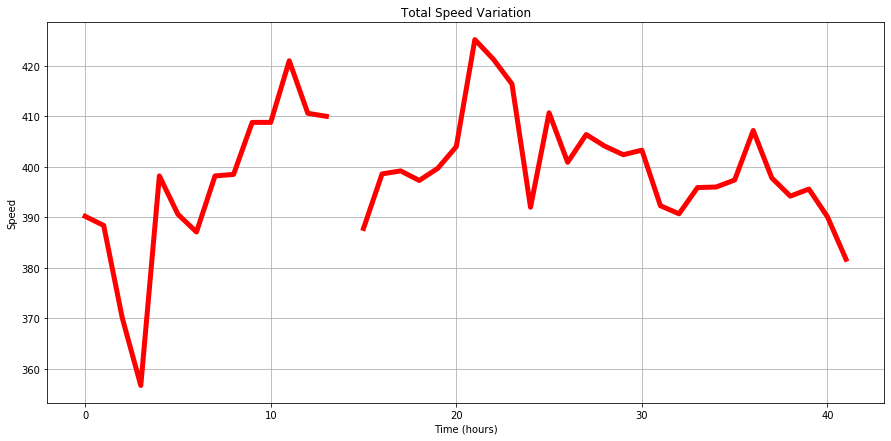

In [177]:
plt.rcParams['figure.figsize'] = 15, 7
plt.title("Total Speed Variation")
plt.xlabel("Time (hours)")
plt.ylabel("Speed")
plt.grid()
plt.plot(passed_hours, speeds, c="r", lw=5)

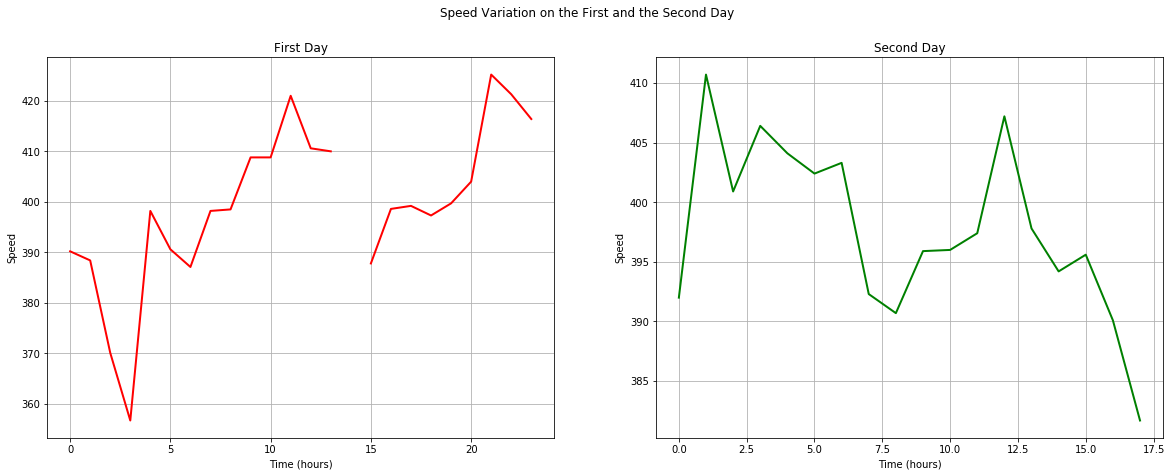

In [198]:
plt.rcParams['figure.figsize'] = 20, 7
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Speed Variation on the First and the Second Day")

ax1.set_title("First Day")
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Speed")
ax1.grid()
ax1.plot(fd_passed_hours, fd_speeds, c="r", lw=2)

ax2.set_title("Second Day")
ax2.set_xlabel("Time (hours)")
ax2.set_ylabel("Speed")
ax2.grid()
ax2.plot(sd_passed_hours, sd_speeds, c="g", lw=2)

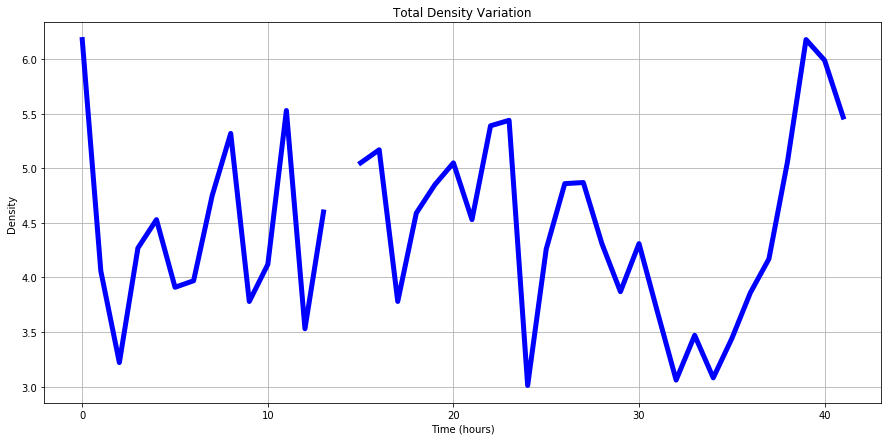

In [170]:
plt.rcParams['figure.figsize'] = 15, 7
plt.title("Total Density Variation")
plt.xlabel("Time (hours)")
plt.ylabel("Density")
plt.grid()
plt.plot(passed_hours, densities, c="b", lw=5)

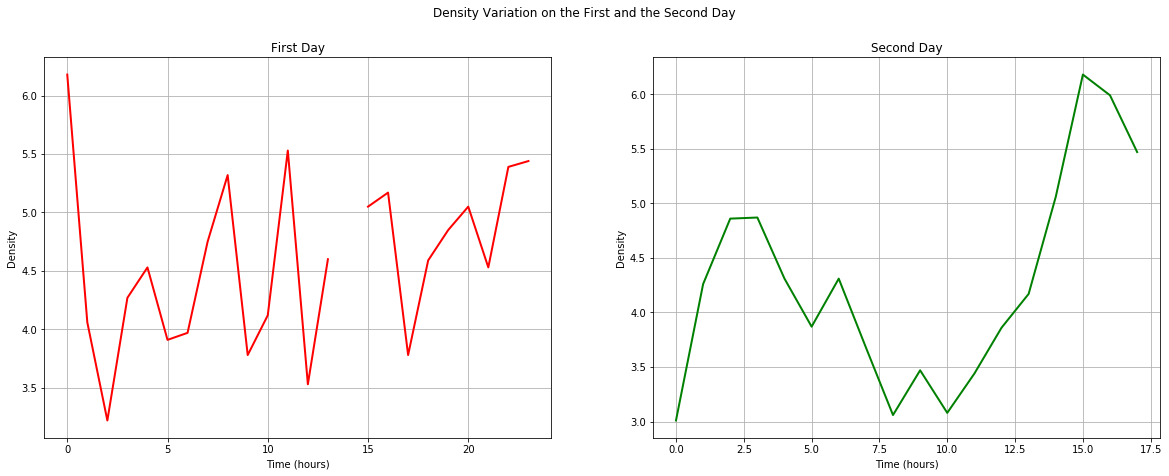

In [199]:
plt.rcParams['figure.figsize'] = 20, 7
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Density Variation on the First and the Second Day")

ax1.set_title("First Day")
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Density")
ax1.grid()
ax1.plot(fd_passed_hours, fd_densities, c="r", lw=2)

ax2.set_title("Second Day")
ax2.set_xlabel("Time (hours)")
ax2.set_ylabel("Density")
ax2.grid()
ax2.plot(sd_passed_hours, sd_densities, c="g", lw=2)

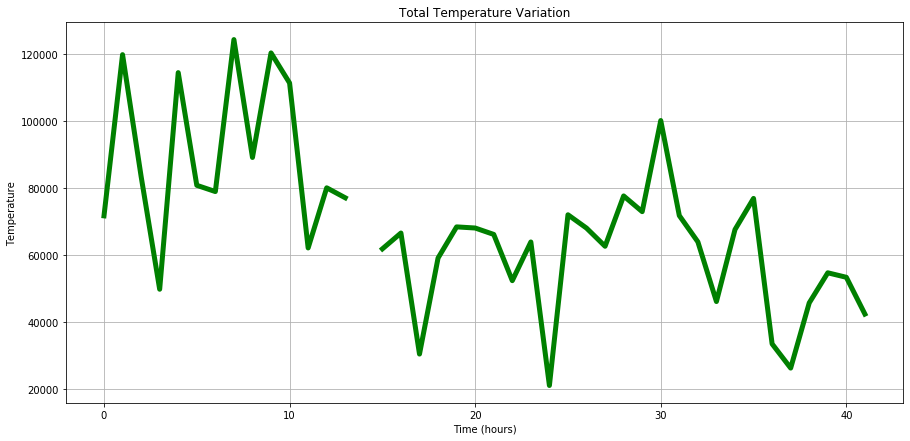

In [200]:
plt.rcParams['figure.figsize'] = 15, 7
plt.title("Total Temperature Variation")
plt.xlabel("Time (hours)")
plt.ylabel("Temperature")
plt.grid()
plt.plot(passed_hours, temperatures, c="g", lw=5)

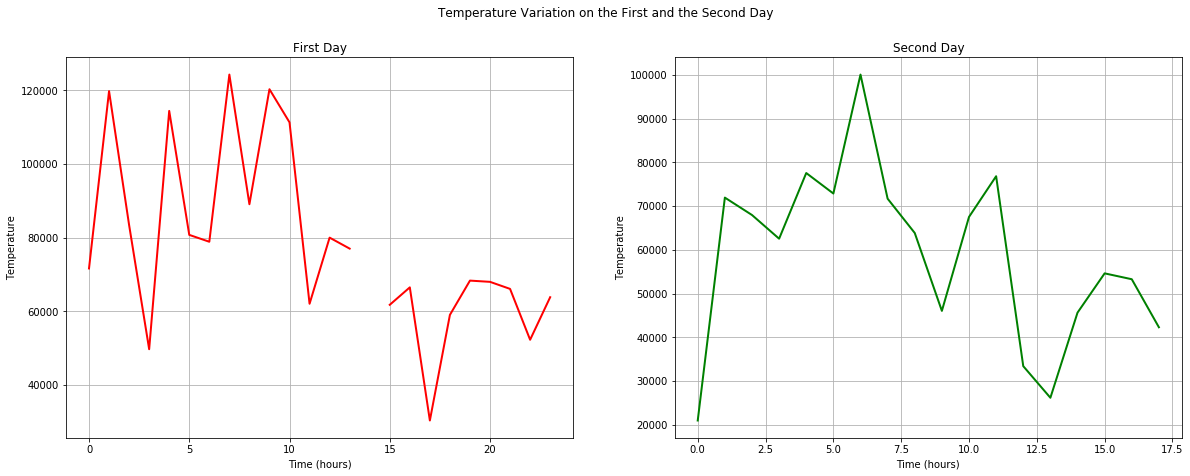

In [201]:
plt.rcParams['figure.figsize'] = 20, 7
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Temperature Variation on the First and the Second Day")

ax1.set_title("First Day")
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Temperature")
ax1.grid()
ax1.plot(fd_passed_hours, fd_temperatures, c="r", lw=2)

ax2.set_title("Second Day")
ax2.set_xlabel("Time (hours)")
ax2.set_ylabel("Temperature")
ax2.grid()
ax2.plot(sd_passed_hours, sd_temperatures, c="g", lw=2)

In [155]:
print(min(temperatures), max(temperatures))

20989 124263


In [156]:
format_color_text = lambda c: c.replace("0x", "#")

In [157]:
color_set = []
colors = []
dec_color = 16711680
temps = np.sort(temperatures, axis=None)
for i in temps:
    c = format_color_text(hex(dec_color))
    color_set.append({"temp":i, "color":c})
    colors.append(c)
    dec_color += 10

In [158]:
def set_color(temp):
    for x in color_set:
        if x["temp"] == temp:
            return x["color"]    

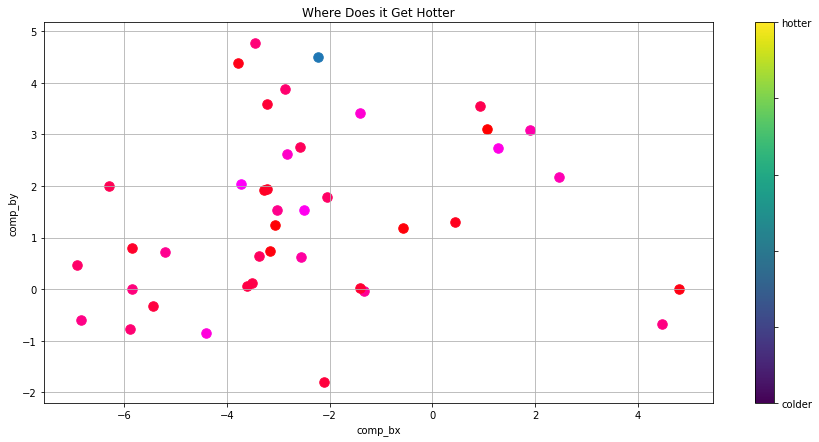

In [205]:
plt.rcParams['figure.figsize'] = 15, 7
for x in range(len(comp_bx)):
    plt.scatter(comp_bx[x], comp_by[x], s=90, c=set_color(temperatures[x]))
cb = plt.colorbar()
cb.ax.set_yticklabels(["colder", "", "", "", "", "hotter"])
plt.title("Where Does it Get Hotter")
plt.xlabel("comp_bx")
plt.ylabel("comp_by")
plt.grid()
plt.show()

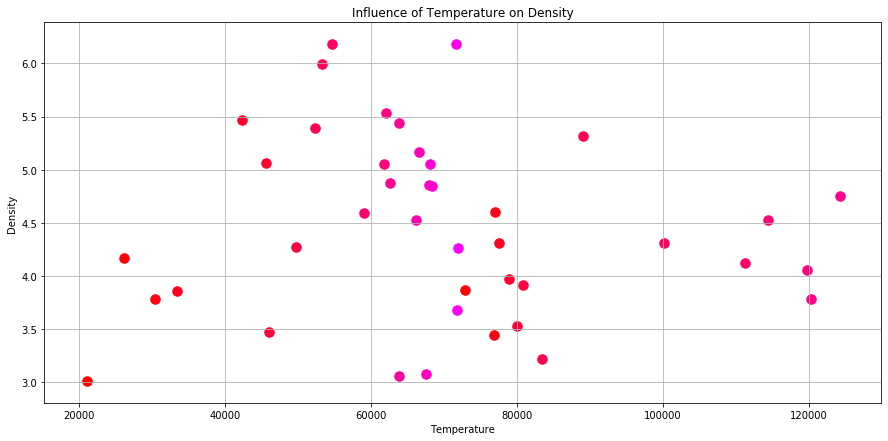

In [206]:
for x in range(len(densities)):
    plt.scatter(temperatures[x], densities[x], s=90, c=set_color(temperatures[x]))
plt.title("Influence of Temperature on Density")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.grid()

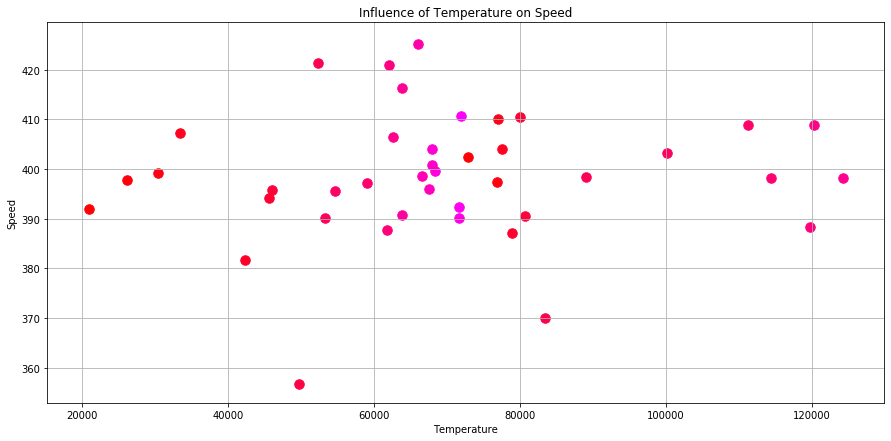

In [207]:
for x in range(len(densities)):
    plt.scatter(temperatures[x], speeds[x], s=90, c=set_color(temperatures[x]))
plt.title("Influence of Temperature on Speed")
plt.xlabel("Temperature")
plt.ylabel("Speed")
plt.grid()